<a href="https://colab.research.google.com/github/paulotolosa/prueba_II_coderhouse/blob/main/Proyecto_ParteII_Tolosa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Subir el archivo diabetes desde Github


In [2]:
import pandas as pd

# URL directa al archivo CSV en GitHub
url = 'https://raw.githubusercontent.com/paulotolosa/prueba_II_coderhouse/main/diabetes.csv'

# Importar el archivo CSV en un DataFrame de pandas
df = pd.read_csv(url)

# Ver las primeras filas del DataFrame para asegurarse de que se importó correctamente
print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      138             62             35        0  33.6   
1            0       84             82             31      125  38.2   
2            0      145              0              0        0  44.2   
3            0      135             68             42      250  42.3   
4            1      139             62             41      480  40.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.127   47        1  
1                     0.233   23        0  
2                     0.630   31        1  
3                     0.365   24        1  
4                     0.536   21        0  


Examina las primeras filas para entender el formato de los datos y los tipos de variables presentes

In [3]:
print(df.dtypes)


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


Resumen estadístico: Calcula estadísticas descriptivas básicas para cada variable, como la media, la mediana, la desviación estándar, los valores mínimo y máximo

In [4]:
print(df.describe())


       Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  2000.000000  2000.000000    2000.000000    2000.000000  2000.000000   
mean      3.703500   121.182500      69.145500      20.935000    80.254000   
std       3.306063    32.068636      19.188315      16.103243   111.180534   
min       0.000000     0.000000       0.000000       0.000000     0.000000   
25%       1.000000    99.000000      63.500000       0.000000     0.000000   
50%       3.000000   117.000000      72.000000      23.000000    40.000000   
75%       6.000000   141.000000      80.000000      32.000000   130.000000   
max      17.000000   199.000000     122.000000     110.000000   744.000000   

               BMI  DiabetesPedigreeFunction          Age      Outcome  
count  2000.000000               2000.000000  2000.000000  2000.000000  
mean     32.193000                  0.470930    33.090500     0.342000  
std       8.149901                  0.323553    11.786423     0.474498  
min  

Creación de gráficos para visualizar la distribución de cada variable por separado. Por ejemplo, histogramas para variables numéricas y gráficos de barras para variables categóricas. Estas visualizaciones pueden revelar tendencias, patrones y posibles valores atípicos en los datos.

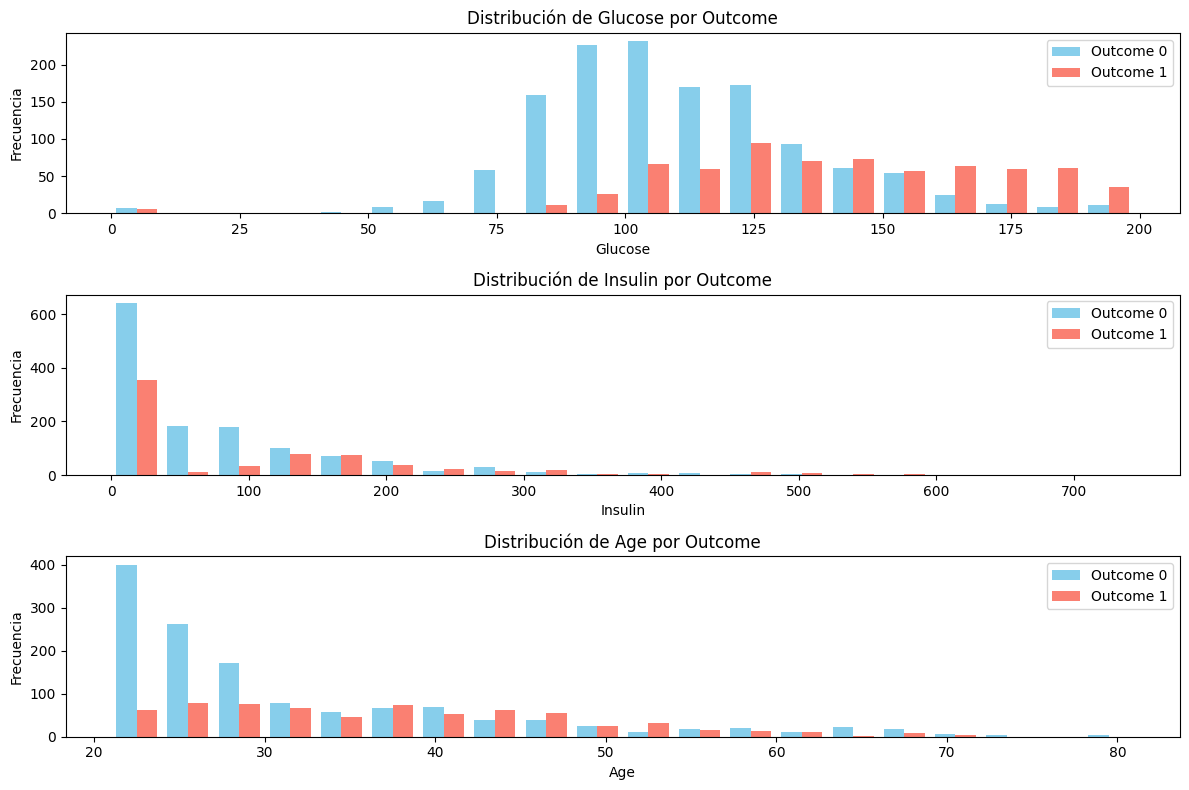

In [6]:
import matplotlib.pyplot as plt

# Filtrar los datos para cada valor de 'Outcome'
outcome_0 = df[df['Outcome'] == 0]
outcome_1 = df[df['Outcome'] == 1]

# Crear histogramas para 'Glucose', 'Insulin' y 'Age' con 'Outcome' como matiz
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.hist([outcome_0['Glucose'], outcome_1['Glucose']], bins=20, color=['skyblue', 'salmon'], label=['Outcome 0', 'Outcome 1'])
plt.title('Distribución de Glucose por Outcome')
plt.xlabel('Glucose')
plt.ylabel('Frecuencia')
plt.legend()

plt.subplot(3, 1, 2)
plt.hist([outcome_0['Insulin'], outcome_1['Insulin']], bins=20, color=['skyblue', 'salmon'], label=['Outcome 0', 'Outcome 1'])
plt.title('Distribución de Insulin por Outcome')
plt.xlabel('Insulin')
plt.ylabel('Frecuencia')
plt.legend()

plt.subplot(3, 1, 3)
plt.hist([outcome_0['Age'], outcome_1['Age']], bins=20, color=['skyblue', 'salmon'], label=['Outcome 0', 'Outcome 1'])
plt.title('Distribución de Age por Outcome')
plt.xlabel('Age')
plt.ylabel('Frecuencia')
plt.legend()

plt.tight_layout()
plt.show()



Graficos en seaborn

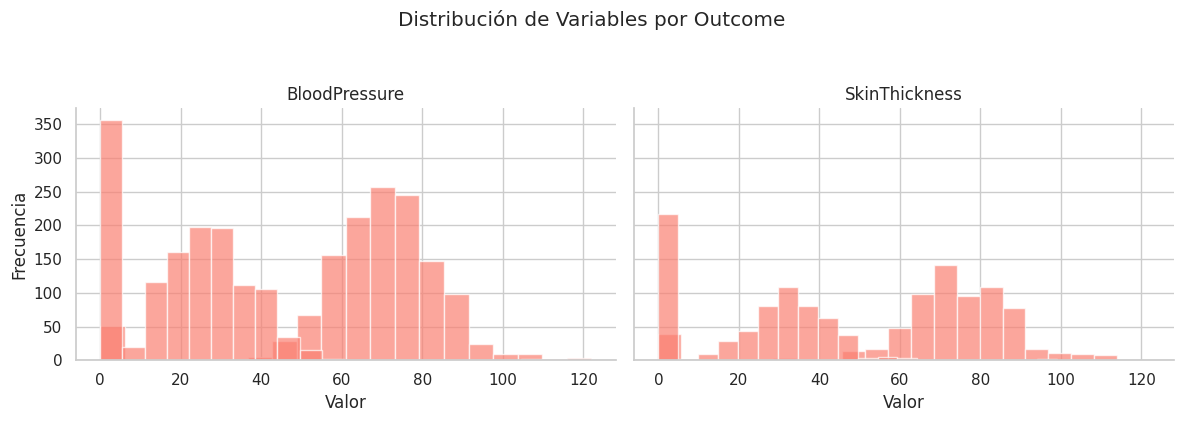

In [14]:
import seaborn as sns

# Seleccionar las variables de interés
variables = ['BloodPressure', 'SkinThickness']

# Configurar el grid con 'Outcome'
sns.set(style="whitegrid")
g = sns.FacetGrid(df, col="Outcome", height=4, aspect=1.5)

# Crear histogramas para cada variable en el grid con colores más fuertes y título
for i, var in enumerate(variables):
    for j, ax in enumerate(g.axes.flat):
        if j == i:
            ax.set_title(var)
            g.map(plt.hist, var, bins=20, color="salmon", alpha=0.7)

# Añadir título y etiquetas
g.set_axis_labels("Valor", "Frecuencia")
g.fig.suptitle("Distribución de Variables por Outcome", y=1.05)

plt.tight_layout()
plt.show()





Calcula la matriz de correlación entre las variables numéricas para entender las relaciones lineales entre ellas. Las variables altamente correlacionadas pueden indicar posibles dependencias o redundancias en los datos.

In [15]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)


                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.120405       0.149672      -0.063375   
Glucose                      0.120405  1.000000       0.138044       0.062368   
BloodPressure                0.149672  0.138044       1.000000       0.198800   
SkinThickness               -0.063375  0.062368       0.198800       1.000000   
Insulin                     -0.076600  0.320371       0.087384       0.448859   
BMI                          0.019475  0.226864       0.281545       0.393760   
DiabetesPedigreeFunction    -0.025453  0.123243       0.051331       0.178299   
Age                          0.539457  0.254496       0.238375      -0.111034   
Outcome                      0.224437  0.458421       0.075958       0.076040   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.076600  0.019475                 -0.025453   
Glucose                   0.320371  0.226

Este código calcula la matriz de correlación entre todas las variables numéricas en el conjunto de datos. Los valores en la matriz de correlación van de -1 a 1, donde:

Un valor cercano a 1 indica una correlación positiva perfecta.
Un valor cercano a -1 indica una correlación negativa perfecta.
Un valor cercano a 0 indica una correlación débil o nula.
Analizando esta matriz, se podrá entender mejor las relaciones lineales entre las variables y detectar posibles dependencias o redundancias en los datos.